<a href="https://colab.research.google.com/github/Manisha868/Codesoft/blob/main/Task2creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import svm

In [8]:
data=pd.read_csv('/content/creditcard.csv', error_bad_lines=False)

<ipython-input-8-55dd401a5b11>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv('/content/creditcard.csv', error_bad_lines=False)
Skipping line 3986: expected 31 fields, saw 32
Skipping line 5973: expected 31 fields, saw 39
Skipping line 9966: expected 31 fields, saw 46
Skipping line 11960: expected 31 fields, saw 33



In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [10]:
data.describe

<bound method NDFrame.describe of         Time        V1        V2        V3        V4        V5        V6  \
0          0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...      ...       ...       ...       ...       ...       ...       ...   
15944  24754  1.252924 -0.182189 -0.802716 -0.210981  1.916713  3.643624   
15945  24756 -0.346979 -2.103284 -0.685061  1.961605 -0.401125  0.473632   
15946  24759 -6.053652 -5.988723  0.810413 -0.011811  1.308135 -0.590803   
15947  24759  1.169121 -1.284945  0.032717 -0.681670  0.660598  4.412578   
15948  24759 -6.917152  5.854171 -1.652458 -1.488884 -0.833891 -0.344418   

             V7        V8        V9  ...       V21   

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15949 entries, 0 to 15948
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    15949 non-null  int64  
 1   V1      15949 non-null  float64
 2   V2      15949 non-null  float64
 3   V3      15949 non-null  float64
 4   V4      15949 non-null  float64
 5   V5      15949 non-null  float64
 6   V6      15949 non-null  float64
 7   V7      15949 non-null  float64
 8   V8      15949 non-null  float64
 9   V9      15949 non-null  float64
 10  V10     15949 non-null  float64
 11  V11     15948 non-null  float64
 12  V12     15948 non-null  float64
 13  V13     15948 non-null  object 
 14  V14     15948 non-null  float64
 15  V15     15948 non-null  float64
 16  V16     15948 non-null  float64
 17  V17     15948 non-null  float64
 18  V18     15948 non-null  float64
 19  V19     15948 non-null  float64
 20  V20     15948 non-null  float64
 21  V21     15948 non-null  float64
 22

In [12]:
data.shape

(15949, 31)

In [13]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       2
V27       3
V28       3
Amount    4
Class     4
dtype: int64

In [14]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       2
V27       3
V28       3
Amount    4
Class     4
dtype: int64

In [15]:
nonfraud=data[data.Class==0]
fraud=data[data.Class==1]

In [16]:
print(nonfraud.shape)
print(fraud.shape)

(15867, 31)
(78, 31)


In [17]:
nonfraud.Amount.describe()

count    15867.000000
mean        64.073480
std        180.080592
min          0.000000
25%          5.800000
50%         15.950000
75%         52.105000
max       7712.430000
Name: Amount, dtype: float64

In [18]:
fraud.Amount.describe()

count      78.000000
mean       89.416282
std       330.538651
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

In [19]:
nonfraud_sample=nonfraud.sample(n=2)

In [20]:
new_data=pd.concat([nonfraud_sample, fraud], axis=0)

In [21]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
4720,2265,-1.266171,-0.321459,1.784605,-2.404879,-1.251838,-0.348121,-0.675538,0.489034,-2.540517,...,0.085012,0.446617,-0.090068,0.095560,0.434890,-0.147216,0.196593,0.023946,69.00,0.0
4154,1668,-1.320565,-0.797760,1.538480,-2.063103,-0.467278,-0.741398,1.490550,-0.324393,-1.524785,...,-0.226593,-0.597701,0.265067,0.520747,0.595780,0.784112,-0.347509,-0.178655,247.89,0.0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
2120,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0


In [22]:
new_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

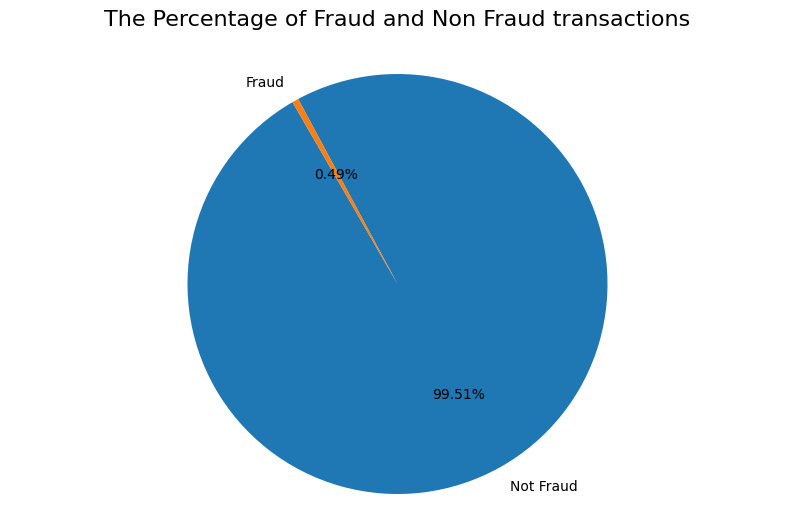

In [44]:
# Visualizing the amount of Fraud and Non Fraud transactions

## The percentage of Fraud and Non Fraud transactions chart

# Define the labels for the pie chart
labels = 'Not Fraud', 'Fraud'

# Calculate the count of Fraud and Non Fraud transactions in the dataset
sizes = [data.Class[data['Class']==0].count(), data.Class[data['Class']==1].count()]

# Create a new figure and axis for the pie chart
fig1, ax1 = plt.subplots(figsize=(10, 6))

# Plot the pie chart with the calculated sizes and labels
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=False, startangle=120)

# Set the axis equal to make the pie chart a perfect circle
ax1.axis('equal')
# Set the title of the pie chart with added distance (pad) between the title and the chart
title = "The Percentage of Fraud and Non Fraud transactions"
plt.title(title, size=16, pad=20)  # You can change the pad value to adjust the distance

# Show the pie chart
plt.show()

In [23]:
Y=new_data['Class']
X=new_data.drop(['Class'], axis=1)

In [103]:
X_train, X_test, Y_train,Y_test= train_test_split(X,Y, random_state=4, test_size=0.2 , stratify=Y)

In [104]:
print(X.shape, X_train.shape, X_test.shape)

(80, 30) (64, 30) (16, 30)


In [105]:
print(Y.shape, Y_train.shape, Y_test.shape)

(80,) (64,) (16,)


In [106]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [107]:
model= LogisticRegression(random_state=0)

In [108]:
model.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [109]:
X_train_predication = model.predict(X_train)

In [110]:
training_data_accuracy=accuracy_score(X_train_predication, Y_train)

In [111]:
print("Accurarcy of training: " ,training_data_accuracy)

Accurarcy of training:  1.0


In [112]:
X_test_predication= model.predict(X_test)
test_data_accurrarcy= accuracy_score(X_test_predication,Y_test)

In [113]:
print("Accuracy of test data: ", test_data_accurrarcy)

Accuracy of test data:  0.9375


In [114]:
# Making the prediction

y_pred = model.predict(X_test)

In [115]:
# Loading the metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# Calculate accuracy using the predicted and true target values (y_pred and y_test)
acc = accuracy_score(Y_test, y_pred)

# Calculate F1 score using the predicted and true target values (y_pred and y_test)
f1 = f1_score(Y_test, y_pred)

# Calculate precision score using the predicted and true target values (y_pred and y_test)
prec = precision_score(Y_test, y_pred)

# Calculate recall score using the predicted and true target values (y_pred and y_test)
rec = recall_score(Y_test, y_pred)

In [116]:
# Getting the results

results = pd.DataFrame([['LogisticRegression', acc, f1, prec, rec]],
                       columns = ["Model", "accuracy", "f1", "precision", "recall"])

results

,Model,accuracy,f1,precision,recall
0,LogisticRegression,0.9375,0.967742,1.0,0.9375


In [117]:
# Checking the confusion matrix

cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[ 0  0]
 [ 1 15]]


In [118]:
input_data=(172785,0.120316379951799,0.931005133456557,-0.54601214242923,-0.745096793161792,1.13031397816167,-0.235973168158629,0.812722065951079,0.115092852853589,-0.204063519469111,-0.657422116060677,0.644837326570703,0.190916232525403,-0.546328942955805,-0.731706584889614,-0.808035531993001,0.599628129130251,0.0704407517011719,0.373110304063873,0.128903790001337,0.000675832856452499,-0.314204648223592,-0.808520401993816,0.0503426632887123,0.102799589780576,-0.435870086042398,0.124078875348614,0.217939865307537,0.0688033338950257,2.69)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction= model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('this is not a fraud')
else:
  print("this is a fraud")

[1.]
this is a fraud


In [119]:
input_data=(185465,0.120316379951799,0.931005133456557,-0.54601214242923,-0.745096793161792,1.13031397816167,-0.235973168158629,0.812722065951079,0.115092852853589,-0.204063519469111,-0.657422116060677,0.644837326570703,0.190916232525403,-0.546328942955805,-0.731706584889614,-0.808035531993001,0.599628129130251,0.0704407517011719,0.373110304063873,0.128903790001337,0.000675832856452499,-0.314204648223592,-0.808520401993816,0.0503426632887123,0.102799589780576,-0.435870086042398,0.124078875348614,0.217939865307537,0.0688033338950257,2.69)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction= model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('this is not a fraud')
else:
  print("this is a fraud")

[1.]
this is a fraud


SVM


In [141]:
model1=svm.SVC(kernel='linear')

In [142]:
model1.fit(X_train,Y_train)

SVC(kernel='linear')

In [143]:
X_train_pre=model1.predict(X_train)

In [144]:
train_acc=accuracy_score(X_train_pre, Y_train)

In [145]:
print('Accuracy bu SVM: ', train_acc)

Accuracy bu SVM:  1.0


In [146]:
X_test_pre=model1.predict(X_test)

In [147]:
test_acc=accuracy_score(X_test_pre, Y_test)

In [148]:
print('Accuracy bu SVM: ', test_acc)

Accuracy bu SVM:  0.9375
